In [57]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [58]:
tf.__version__

'2.7.0'

In [59]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('forest_fire/Training and Validation',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1832 images belonging to 2 classes.


In [60]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('forest_fire/Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 68 images belonging to 2 classes.


In [61]:
cnn = tf.keras.models.Sequential()

In [62]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [63]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [64]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [65]:
cnn.add(tf.keras.layers.Flatten())

In [66]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [67]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [68]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [69]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
58/58 [==============================] - 57s 874ms/step - loss: 0.2529 - accuracy: 0.8996 - val_loss: 0.3103 - val_accuracy: 0.8971
Epoch 2/25
58/58 [==============================] - 13s 228ms/step - loss: 0.1447 - accuracy: 0.9503 - val_loss: 0.3306 - val_accuracy: 0.8676
Epoch 3/25
58/58 [==============================] - 10s 167ms/step - loss: 0.1511 - accuracy: 0.9432 - val_loss: 0.2744 - val_accuracy: 0.9118
Epoch 4/25
58/58 [==============================] - 12s 199ms/step - loss: 0.1396 - accuracy: 0.9541 - val_loss: 0.3020 - val_accuracy: 0.9265
Epoch 5/25
58/58 [==============================] - 10s 174ms/step - loss: 0.1351 - accuracy: 0.9547 - val_loss: 0.3657 - val_accuracy: 0.8676
Epoch 6/25
58/58 [==============================] - 9s 153ms/step - loss: 0.1123 - accuracy: 0.9591 - val_loss: 0.2507 - val_accuracy: 0.8971
Epoch 7/25
58/58 [==============================] - 9s 151ms/step - loss: 0.1161 - accuracy: 0.9607 - val_loss: 0.3060 - val_accuracy: 0.9118
E

In [70]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('forest_fire/single_prediction/fire_or_not_6.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'no_fire'
else:
  prediction = 'fire'

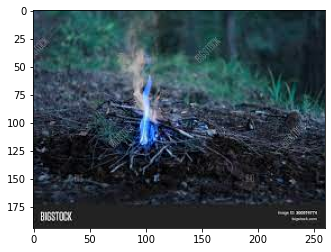

In [71]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('forest_fire/single_prediction/fire_or_not_6.jpg',cv2.IMREAD_UNCHANGED)  #cv2.IMREAD_COLOR  or 1
plt.imshow(im)
plt.show()

In [72]:
print(prediction)

no_fire


In [73]:
cnn.save('cnn.h5')

In [74]:
!pip install opencv-python